e:\Trainings\Python ML\Labs\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


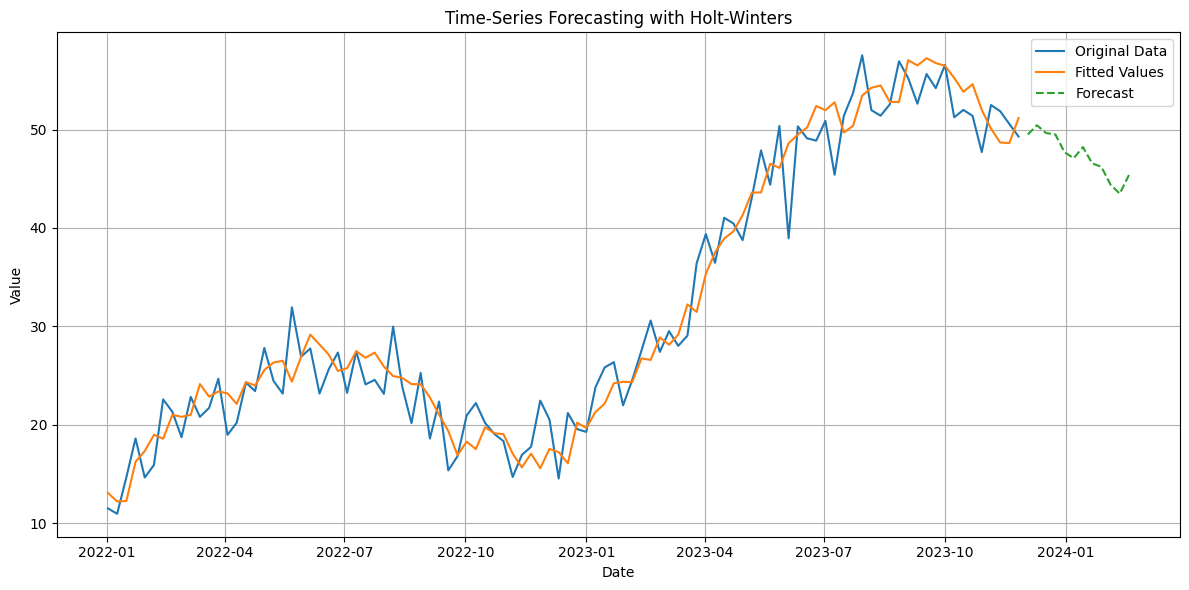

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate synthetic time-series data
np.random.seed(42)
periods = 100
time = pd.date_range(start='2022-01-01', periods=periods, freq='W')
trend = np.linspace(10, 50, periods)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, periods))
noise = np.random.normal(scale=3, size=periods)
data = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Date': time, 'Value': data})
df.set_index('Date', inplace=True)

# Fit the Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast the next 12 time steps
forecast = fit.forecast(steps=12)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, fit.fittedvalues, label='Fitted Values')
plt.plot(pd.date_range(df.index[-1], periods=13, freq='W')[1:], forecast, label='Forecast', linestyle='--')
plt.title('Time-Series Forecasting with Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\usamawahabkhan\AppData\Local\Temp\ipykernel_24364\747622086.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = pd.Series(data, index=pd.date_range(start='2020-01-01', periods=periods, freq='M'))
C:\Users\usamawahabkhan\AppData\Local\Temp\ipykernel_24364\747622086.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(), periods=forecast_steps, freq='M')


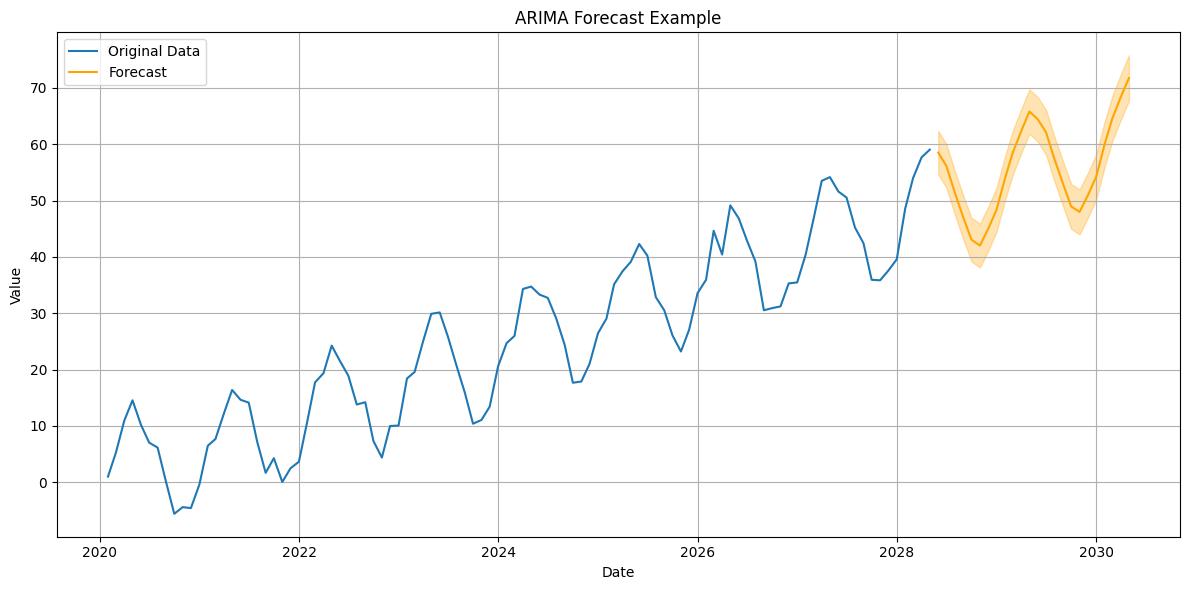

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate synthetic time series data with trend and seasonality
np.random.seed(42)
periods = 100
time = np.arange(periods)
trend = time * 0.5
seasonality = 10 * np.sin(2 * np.pi * time / 12)
noise = np.random.normal(scale=2, size=periods)
data = trend + seasonality + noise

# Create a pandas Series
ts = pd.Series(data, index=pd.date_range(start='2020-01-01', periods=periods, freq='M'))

# Fit ARIMA model (SARIMAX with seasonal order)
model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Forecast the next 24 months
forecast_steps = 24
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(), periods=forecast_steps, freq='M')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('ARIMA Forecast Example')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

